
## ⏰🔔1주차 미션 내용 🔔⏰

In [ ]:
#라이브러리 로딩
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split


# import koreanize_matplotlib
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')


✨ 데이타 검토 및 결측치파악

In [ ]:
#데이타검토
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#데이타 개수및 유형파악
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# TotalCharges의 경우 숫자형 데이타인데 문자로 되어있고
#유효한 데이타로 여겨져 숫자형으로 변환

df['TotalCharges'] = df['TotalCharges'].apply(lambda x: float(x) if x and x.replace('.', '').isdigit() else 0)

In [ ]:
# 숫자형 통계값
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
## SeniorCitizen의 경우 True False의 의미로 보이므로

/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


<Axes: >

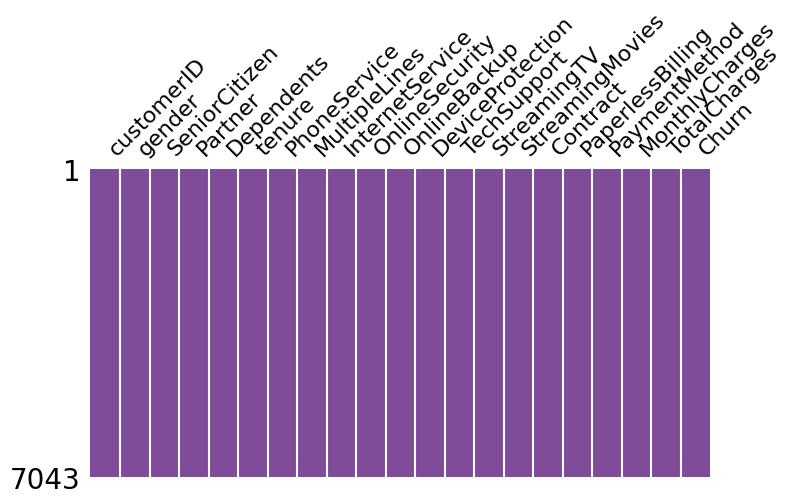

In [ ]:
#결측치 시각화
import missingno as msno

fig, ax = plt.subplots(figsize=(8, 4))  # 가로 6, 세로 4 크기의 그래프
msno.matrix(df=df.iloc[:, :], color=(0.5, 0.3, 0.6), ax=ax)

In [ ]:
# 결측치 카운트
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 📌 미션 1) - 학습, 예측 데이터셋을 나눠주세요.

X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제
X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
예측에 사용할 데이터셋 예) 실전 시험문제
y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
학습(훈련)에 사용할 정답 값 예) 기출문제의 정답
y_test : label_name 에 해당 되는 컬럼만 test에서 가져옵니다.
예측에 사용할 정답 값 예) 실전 문제의 정답
아래의 형태로 데이터셋을 나누되, train 데이터셋의 shape 는 (5625, 9), test 데이터셋의 shape 는 (1407, 9) 이 되도록 합니다. 행의 customerID 는 섞여도 상관 없으며 아래와 순서가 달라도 되며, train, test의 shape 값의 행의 수가 8:2 로 나뉘면 됩니다

✅⚡ 전처리방식
- 텍스트데이타의 라벨링이 가능한지를 판단해 라벨링이 가능한 unique숫자의 범주일때는 라벨링을 합니다.
- 숫자형 데이타의 경우 정규화를 시도해 학습이 더 잘되도록 전처리를 합니다.
- 이러한 전처리를 하며 학습셋과 예측 데이타셋을 나눕니다.

In [ ]:
#전체칼럼확인
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# 피쳐데이타와 라벨데이타 분리
feature_names = df.columns[:-1].tolist()
label_names = df.columns[-1:]
print(feature_names,label_names)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'] Index(['Churn'], dtype='object')


In [ ]:
# 문자형 통계값
df.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


- 문자형 데이타의 경우 unique숫자가 크지 않으므로 머신러닝에 유효한 데이타일 가능성이 높기때문에 라벨링 하는게 낫다고봄

In [ ]:
# 전체 칼럼
column_names = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
                'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

In [ ]:
# 숫자형 데이타빼고는 라벨링
to_encode_names =['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                  'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [ ]:

df1 = df[column_names].copy()
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [ ]:
# # 문자형데이타들을 모두 원핫으로 인코딩

# df_encoded = pd.get_dummies(df, columns=to_encode_names, prefix='en')

In [ ]:
# 문자형을 모두 라벨링

from sklearn.preprocessing import LabelEncoder
# df['칼럼명'] = label_encoder.fit_transform(df['칼럼명'])
le = LabelEncoder()
df1[to_encode_names] = df1[to_encode_names].apply(lambda x: le.fit_transform(x))

df1[to_encode_names]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


In [ ]:
# 라벨데이타도 라벨링
df[label_names] = df[label_names] .apply(lambda x: le.fit_transform(x))
df[label_names]

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
#훈련셋과 테스트셋을 나눔

X =df1.copy()
y = df[label_names].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [ ]:
# 쉐이프를 확인
# 문제에서 제시한것과 모양이다른 이유는 유효데이타라고 판단되어 라벨링을 모두했기때문입니다.

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5634, 19) (1409, 19) (5634, 1) (1409, 1)


In [ ]:
# Xtrain데이타 확인
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3451,1,1,1,0,65,1,0,1,0,0,0,0,0,0,1,1,0,70.95,4555.20
359,1,0,1,1,42,1,2,1,2,0,0,0,2,2,1,0,2,97.10,4016.75
3296,0,0,0,0,24,1,0,0,0,0,2,0,0,0,0,1,1,49.30,1233.25
6641,0,0,0,0,16,1,0,0,2,0,0,0,0,0,0,1,2,50.15,762.25
1619,1,0,0,0,69,1,2,0,2,2,2,2,0,2,2,1,1,81.50,5553.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051,0,0,1,0,72,1,2,1,0,2,0,0,2,2,2,1,1,97.70,6869.70
3105,1,0,0,0,26,1,0,0,0,0,0,2,0,0,0,0,0,49.15,1237.30
697,1,0,1,1,3,1,0,0,0,0,2,0,0,0,0,1,2,50.15,168.15
4635,0,0,1,1,40,1,0,2,1,1,1,1,1,1,2,0,0,20.15,777.35


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# 숫자데이타의 경우 다른데이타보다 크기때문에 학습의 효율을 위해 정규화를 해주려고 합니다.

scaler = MinMaxScaler()
X_train['MonthlyCharges'] = scaler.fit_transform(X_train[['MonthlyCharges']])
X_train['TotalCharges'] = scaler.fit_transform(X_train[['TotalCharges']])
X_train['tenure'] = scaler.fit_transform(X_train[['tenure']])

scaler = MinMaxScaler()
X_test['MonthlyCharges'] = scaler.fit_transform(X_test[['MonthlyCharges']])
X_test['TotalCharges'] = scaler.fit_transform(X_test[['TotalCharges']])
X_test['tenure'] = scaler.fit_transform(X_test[['tenure']])

In [ ]:
# 모든 컬럼 정규화
columns = X_train.columns

scaler = MinMaxScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.fit_transform(X_test[columns])


In [ ]:
#모든 칼럼이 정규화된 훈련셋
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3451,1.0,1.0,1.0,0.0,0.902778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.000000,0.524378,0.524503
359,1.0,0.0,1.0,1.0,0.583333,1.0,1.0,0.5,1.0,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.666667,0.784577,0.462503
3296,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.308955,0.142001
6641,0.0,0.0,0.0,0.0,0.222222,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.317413,0.087768
1619,1.0,0.0,0.0,0.0,0.958333,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.333333,0.629353,0.639422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4051,0.0,0.0,1.0,0.0,1.000000,1.0,1.0,0.5,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.333333,0.790547,0.791003
3105,1.0,0.0,0.0,0.0,0.361111,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.307463,0.142467
697,1.0,0.0,1.0,1.0,0.041667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.317413,0.019361
4635,0.0,0.0,1.0,1.0,0.555556,1.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,1.0,0.0,0.000000,0.018905,0.089507


In [ ]:
# 테스트셋도 동일하게 가공처리
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
430,0.0,0.0,1.0,1.0,0.847222,1.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1.0,1.000000,0.006009,0.136394
1763,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.266400,0.009337
6250,0.0,0.0,1.0,0.0,0.958333,1.0,1.0,0.5,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.804707,0.792995
3879,1.0,0.0,0.0,0.0,0.013889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.269905,0.005277
3182,0.0,0.0,1.0,0.0,0.625000,1.0,0.0,0.5,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.333333,0.765148,0.494320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,0.0,1.0,0.0,0.0,0.569444,1.0,0.0,0.5,0.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,0.000000,0.824236,0.463224
4526,1.0,0.0,0.0,0.0,0.180556,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.550325,0.110339
1400,1.0,0.0,0.0,1.0,0.041667,1.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,1.000000,0.011517,0.006724
6919,1.0,0.0,0.0,0.0,0.750000,1.0,1.0,0.5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.707061,0.561643


 ## 📌  미션 2) - 머신러닝 알고리즘 모델을 통한 학습과 예측을 해주세요.

강의에 있는 DecisionTree 를 사용해도 되며, 사이킷런의 다른 모델을 사용해도 됩니다. 다음과 같이 예측값이 나오도록 예측해 주세요. 이탈여부의 Yes, No 는 예시로 다음의 결과와 달라도 상관 없습니다.
y_predict[:5] 를 출력했을 때 아래처럼 이탈 여부에 대한 값이 나옵니다.
array(['No', 'No', 'No', 'No', 'No'], dtype=object)
사이킷런에서 좋은 성능을 내고 주목받고 있는 알고리즘을 별도의 라이브러리로 공개되어 있는 것들이 다음과 같습니다.

부스팅계열 알고리즘(주로 정형 데이터) => XGBoost, LightGBM, CatBoost 등
신경망 알고리즘(주로 비정형 데이터) => TensorFlow, Keras, PyTorch 등
알고리즘 중에는 분류, 회귀에 따로 사용할 수 있는 것도 있고, 분류, 회귀에 모두 사용할 수 있는 것도 있습니다.

회귀 알고리즘 => 분류(로지스틱 회귀), 회귀(릿지, 라쏘, 엘라스틱넷) 분류에 사용하는 알고리즘과 회귀에 사용하는게 다릅니다.
분류 및 회귀 트리(Classification And Regression Tree, CART) => 분류와 회귀에 모두 사용할 수 있습니다.
결정 트리 학습법 - 위키백과, 우리 모두의 백과사전

머신러닝 모델의 성능을 개선하는 방법

데이터 분할
데이터 전처리, 결측치 처리
피처 선택, 피처 엔지니어링(스케일링, 변환, 인코딩 등)
모델의 파라미터 값을 변경하는 방법
머신러닝 알고리즘 모델을 통한 학습과 예측을 해주세요.

✅⚡ 학습비교
- 랜덤포레스트 앙상블, xgboost, 의사결정나무 세가지로 학습을 시켜보고 어느쪽의 판단이 더 정확한지 비교해봅니다.

In [ ]:
# 랜덤포레스트 앙상블
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=0)
model.fit(X_train, y_train)

<ipython-input-19-554727e30ea1>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, n_estimators=500, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
y_predict = model.predict(X_test)
print(y_predict[:5])
accuracy_score(y_test, y_predict)

[0 1 0 1 0]


0.7934705464868701

In [ ]:
# xgboost
from xgboost import XGBClassifier

model = XGBClassifier(random_state=0)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
#조기종료
model = XGBClassifier(random_state=0,
                      use_label_encoder=False,
                      eval_metric='logloss',
                      learning_rate=0.05,
                      n_estimators=50,
                      )
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=10)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

[0]	validation_0-logloss:0.56454
[1]	validation_0-logloss:0.55138
[2]	validation_0-logloss:0.53981
[3]	validation_0-logloss:0.52878
[4]	validation_0-logloss:0.51946
[5]	validation_0-logloss:0.51046
[6]	validation_0-logloss:0.50197
[7]	validation_0-logloss:0.49440
[8]	validation_0-logloss:0.48732
[9]	validation_0-logloss:0.48103
[10]	validation_0-logloss:0.47560
[11]	validation_0-logloss:0.47030
[12]	validation_0-logloss:0.46519
[13]	validation_0-logloss:0.46078
[14]	validation_0-logloss:0.45695
[15]	validation_0-logloss:0.45329
[16]	validation_0-logloss:0.44957
[17]	validation_0-logloss:0.44606
[18]	validation_0-logloss:0.44295
[19]	validation_0-logloss:0.43983
[20]	validation_0-logloss:0.43719
[21]	validation_0-logloss:0.43464


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.43259
[23]	validation_0-logloss:0.43006
[24]	validation_0-logloss:0.42804
[25]	validation_0-logloss:0.42618
[26]	validation_0-logloss:0.42470
[27]	validation_0-logloss:0.42358
[28]	validation_0-logloss:0.42204
[29]	validation_0-logloss:0.42066
[30]	validation_0-logloss:0.41926
[31]	validation_0-logloss:0.41823
[32]	validation_0-logloss:0.41691
[33]	validation_0-logloss:0.41577
[34]	validation_0-logloss:0.41523
[35]	validation_0-logloss:0.41407
[36]	validation_0-logloss:0.41361
[37]	validation_0-logloss:0.41319
[38]	validation_0-logloss:0.41217
[39]	validation_0-logloss:0.41173
[40]	validation_0-logloss:0.41089
[41]	validation_0-logloss:0.41029
[42]	validation_0-logloss:0.40957
[43]	validation_0-logloss:0.40908
[44]	validation_0-logloss:0.40877
[45]	validation_0-logloss:0.40829
[46]	validation_0-logloss:0.40773
[47]	validation_0-logloss:0.40716
[48]	validation_0-logloss:0.40670
[49]	validation_0-logloss:0.40655


0.8055358410220014

In [ ]:
from sklearn.metrics import accuracy_score
y_predict = model.predict(X_test)
print(y_predict[:5])
accuracy_score(y_test, y_predict)

[0 1 0 1 0]


0.8055358410220014

In [ ]:
# 의사결정나무 하이퍼 파라미터
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=1,
                               min_samples_split=5, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=5,
                       random_state=0)

In [ ]:
y_predict = model.predict(X_test)
print(y_predict[:5])
accuracy_score(y_test, y_predict)

[0 1 0 1 0]


0.8133427963094393

 ## 📌  미션 3) - 점수 측정하고 피처의 중요도 시각화 해주세요.

예측한 데이터셋의 점수를 Accuracy로 측정하고 모델이 학습한 피처의 중요도를 시각화 해주세요.
피처 중요도 이미지는 예시이며 다른 결과가 나와도 상관 없습니다. 또, 트리 계열 모델이 아닌 다른 모델로 학습했을 때도 해당 모델에 맞는 피처 중요도를 시각화 해주세요.

✅⚡ 학습비교
- 랜덤포레스트 앙상블, xgboost, 의사결정나무 세가지에서 피처중요도의 차이를 비교해봅니다.

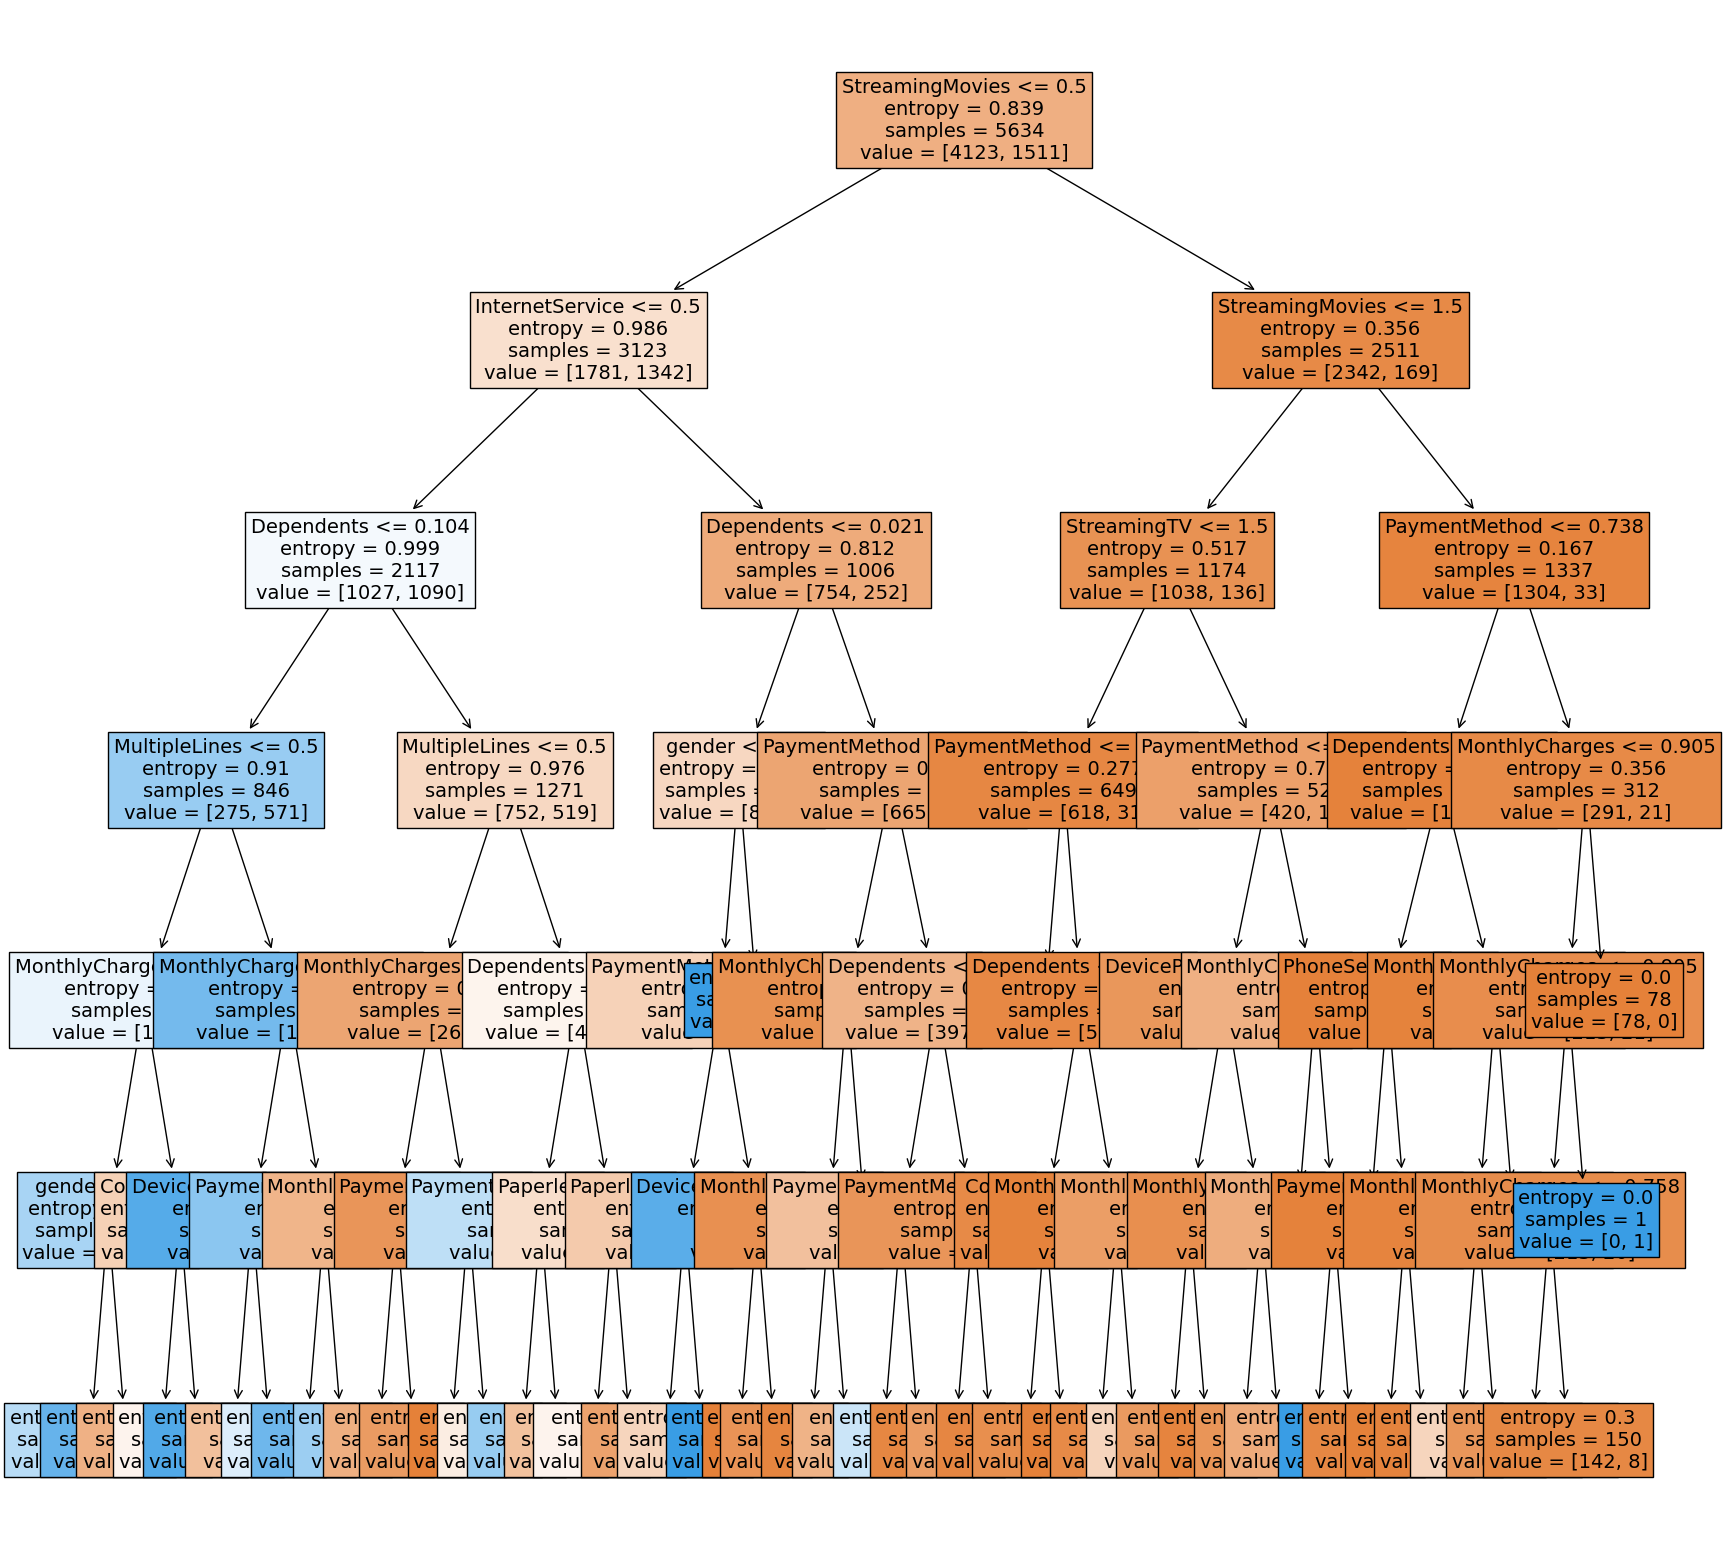

In [ ]:
# 3-1) 트리 시각화 하기
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=14)

<ipython-input-29-91a299adba44>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


<Axes: >

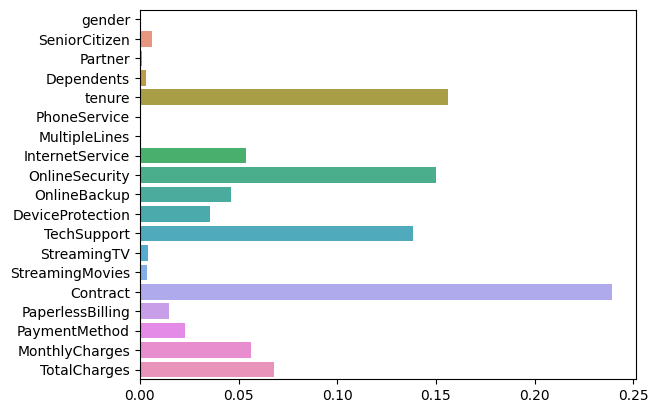

In [ ]:
# 3-2) 피처 중요도 시각화 하기
# 랜덤포레스트 앙상블
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=0)
model.fit(X_train, y_train)
sns.barplot(x=model.feature_importances_, y=column_names)

<Axes: >

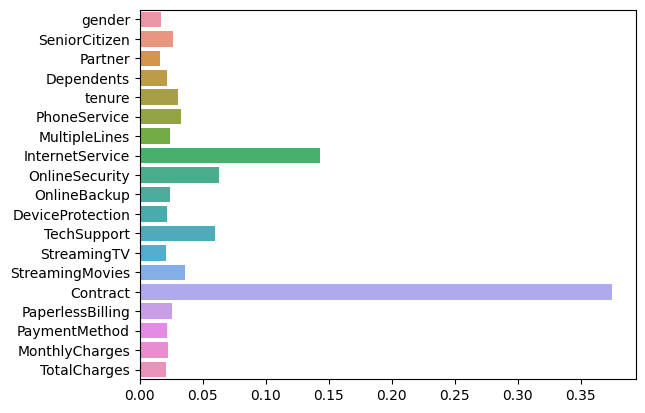

In [ ]:
# xgboost
from xgboost import XGBClassifier

model = XGBClassifier(random_state=0)
model.fit(X_train, y_train)
sns.barplot(x=model.feature_importances_, y=column_names)

<Axes: >

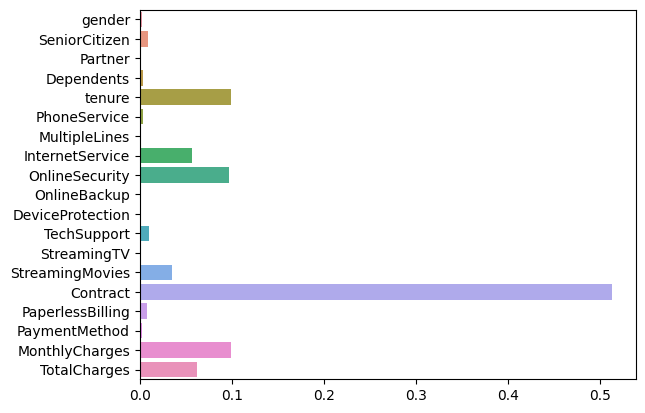

In [ ]:
# 의사결정나무 하이퍼 파라미터
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=1,
                               min_samples_split=5, random_state=0)
model.fit(X_train, y_train)
sns.barplot(x=model.feature_importances_, y=column_names)

In [ ]:
from sklearn.metrics import accuracy_score
y_predict = model.predict(X_test)
print(y_predict[:5])
accuracy_score(y_test, y_predict)

[0 0 0 1 0]


0.7982954545454546

In [ ]:
y_predict = model.predict(X_test)
y_predict[:5]

array([0, 0, 0, 1, 0])

### 3-3) 정확도(Accuracy)구하기

In [ ]:
#XGBClassifier
model = XGBClassifier(random_state=0,
                      use_label_encoder=False,
                      eval_metric='logloss',
                      booster='gbtree',
                      objective='binary:logistic',
                      max_depth=5,
                      learning_rate=0.05,
                      n_estimators=500,
                      subsample=1,
                      colsample_bytree=1,
                      n_jobs=-1,

                      # booster (기본값 gbtree) : 부스팅 알고리즘 (또는 dart, gblinear)
                      # objective (기본값 binary:logistic) : 이진분류 (다중분류: multi:softmax)
                      # max_depth (기본값 6) : 최대 한도 깊이
                      # learning_rate (기본값 0.1) : 학습률
                      # n_estimators (기본값 100) : 트리의 수
                      # subsample (기본값 1) : 훈련 샘플 개수의 비율
                      # colsample_bytree (기본값 1) : 특성 개수의 비율
                      # n_jobs (기본값 1) : 사용 코어 수 (-1: 모든 코어를 다 사용)
                      )
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.8041163946061036

In [ ]:
# 의사결정나무 하이퍼 파라미터
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=1,
                               min_samples_split=5, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=5,
                       random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
y_predict = model.predict(X_test)
print(y_predict[:5])
accuracy_score(y_test, y_predict)

[0 1 0 1 0]


0.8133427963094393

###🍇  프로젝트 후기  
- 베이스라인으로 전처리했을시 75% 내외지만 모든칼럼을 라벨링하고 정규화했을때 정확도 80% 이상 81% 이상도 정확도가 나오는것을 알수있었습니다.
- 팀원분들이 이미 프로분들이 계셔서 유용한 분석의견을 들을수있어 매우 좋았습니다.